### Fiona Fan

In [17]:
import numpy as np
from scipy import linalg as la

In [18]:
def f(A,tol):
    lamda,V=la.eig(np.dot(A.conj().T,A))
    sigma=np.sqrt(lamda)
    sigma1=((-1)*sigma).argsort()
    sigma=sigma[sigma1]
    V=V[:,sigma1]
    r= sum(i > tol for i in sigma)
    sigma1=sigma[:r]
    V1=V[:,:r]
    U1=np.dot(A,V1)/sigma1
    return U1,sigma1,V1.conj().T

In [19]:
A=np.random.random((10,5))
U1,s,V1=f(A,0.0000000001)
print(U1.shape,s.shape,V1.shape)
np.allclose(U1.T@U1,np.identity(5))

(10, 5) (5,) (5, 5)


True

In [20]:
np.allclose(U1@ np.diag(s) @ V1, A)

True

In [21]:
np.linalg.matrix_rank(A) == len(s)

True

Problem 2

In [22]:
from matplotlib import pyplot as plt
def p(A):
    S=np.zeros((2,200))
    theta=np.random.uniform(low=0.0, high=2*np.pi, size=200)
    theta=np.sort(theta)
    S[0]=np.cos(theta)
    S[1]=np.sin(theta)
    E=np.array(([1,0,0],[0,0,1]))
    E.reshape((2,3))
    ax1=plt.subplot(221)
    ax1.plot(S[0],S[1])
    ax1.plot(E[0],E[1])
    plt.axis("equal")
    U,s,Vh = la.svd(A, full_matrices=True)
    s=np.diag(s)
    temp1=np.dot(Vh,S)
    temp2=np.dot(Vh,E)
    
    ax2=plt.subplot(222)
    ax2.plot(temp1[0],temp1[1])
    ax2.plot(temp2[0],temp2[1])
    plt.axis("equal")
    
    
    ax3=plt.subplot(223)
    ax3.plot(np.dot(s,temp1)[0],np.dot(s,temp1)[1])
    ax3.plot(np.dot(s,temp2)[0],np.dot(s,temp2)[1])
    plt.axis("equal")
    
    ax4=plt.subplot(224)
    ax4.plot(np.dot(U,np.dot(s,temp1))[0],np.dot(U,np.dot(s,temp1))[1])
    ax4.plot(np.dot(U,np.dot(s,temp2))[0],np.dot(U,np.dot(s,temp2))[1])
    plt.axis("equal")

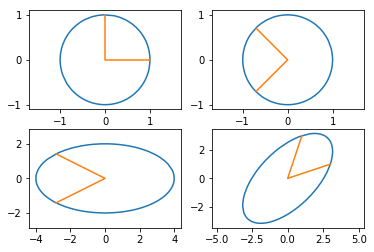

In [23]:
A=np.array(([3,1],[1,3]))
A.reshape(2,2)
p(A)

Problem 3

In [24]:
from numpy.linalg import matrix_rank
def p3(A,S):
    U,s,Vh = la.svd(A, full_matrices=False)
    if S > matrix_rank(A): 
        raise ValueError('invalid input')
    U=U[:,:S]
    s=s[:S]
    Vh=Vh[:S,:]
    return U,s,Vh, U.size+s.size+Vh.size

In [25]:
A=np.random.random((20,20))
p3(A,6)

(array([[-0.23718889, -0.14327795,  0.12467074,  0.30127161, -0.05622485,
         -0.35851612],
        [-0.2347532 ,  0.07665132,  0.2909433 ,  0.09090771,  0.47866162,
          0.02934012],
        [-0.18716472, -0.20331126, -0.03025685, -0.36279309, -0.00510131,
         -0.28657709],
        [-0.21704495,  0.33897701,  0.05363538, -0.30936198, -0.07419282,
          0.21226552],
        [-0.21465214, -0.03770329,  0.24851476, -0.10581283, -0.48669395,
         -0.04569933],
        [-0.20596926, -0.25816739,  0.25477028, -0.03600045, -0.03393615,
         -0.20618305],
        [-0.22130141, -0.19345981, -0.30783716,  0.22365463, -0.08489982,
         -0.22394969],
        [-0.17338625, -0.17591332, -0.0720301 , -0.52615958, -0.00431271,
         -0.12614737],
        [-0.24915135, -0.17858176, -0.12510617, -0.10031496, -0.33229504,
          0.34423004],
        [-0.17502741, -0.05509934,  0.23446113,  0.2212079 , -0.3245034 ,
          0.13189732],
        [-0.22223152,  0.17966

Problem 4

In [26]:
def choose_S(s,tol):
    S=0
    for i in range(0,len(s)):
        if (s[i]<tol)==True:
            S=i-1
            break
    return S
def p4(A,tol):
    U,s,Vh = la.svd(A, full_matrices=False)
    if tol < s.min(): 
        raise ValueError('invalid input')
    S=choose_S(s,tol)
    U=U[:,:S]
    s=s[:S]
    Vh=Vh[:S,:]
    return U,s,Vh, U.size+s.size+Vh.size


In [28]:
U,s,Vh,size = p4(A,0.1)
#test
la.norm(A-U@np.diag(s)@Vh)

0.14811691721891157

In [29]:
def j(A,k):
    
    U,s,Vh,n= p3(A,k)
    return np.dot(U,np.dot(np.diag(s),Vh)), n



Problem 5

In [30]:
def p5(name,k):
    if plt.imread(name).ndim==3:
        image_color=plt.imread(name)/255 
        R=image_color[:,:,0]
        G=image_color[:,:,1]
        B=image_color[:,:,2]
        R_s,n1=j(R,k)
        G_s,n2=j(G,k)
        B_s,n3=j(B,k)
        n=n1+n2+n3
        image=np.dstack((R_s,G_s,B_s))
        image=np.clip(image,0,1)
        
    else:
        image_color=plt.imread(name)/255 
        image,n=j(image_color,k)
    ax1=plt.subplot(121)
    ax1.imshow(image)
    ax2=plt.subplot(122)
    ax2.imshow(image_color)
    plt.suptitle(image_color.size-n)

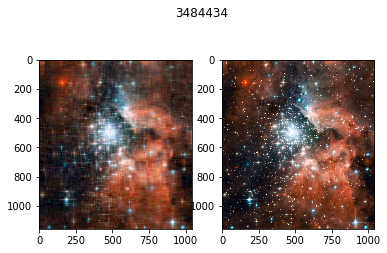

In [31]:
p5("hubble.jpg",20)
